# Analýza axiální složky elektrického pole

Předpokládáme dost obecnou konfiguraci napětí na elektrodách pasti, kde páry radiálních elektrod jsou buzeny různými amplitudami i s různými fázemi. Dále pak obě axiální elektrody mají RF složku potenciálu opět s různými fázemi.


\begin{figure} [ht]
				\centering
				\includegraphics[width=0.7\linewidth]{schema.png}
			\end{figure}

Jednotlivé elektrody generují E-pole na ose z, nejdříve si zjistíme generované pole jednotlivých elektrod $E_{k,z}(0,0,z)$

In [30]:
# import jednotlivych osovych poli z comsolu
# 13 - par rad. el. y
# 24 - par rad. el. x
# 5 - axialni elektroda z-
# 6 - axialni elektroda z+

# ze symetrie: E_13 = E_24
#              E_5 = - E_6

using DelimitedFiles

## nacteni dat ze souboru
# pole generovano axialni elektrodou v + 2.25mm
#z_ax_data = readdlm("axial_el_unitary_field_delim.txt")[:,2]
#E_field_ax_data = readdlm("axial_el_unitary_field_delim.txt")[:,3];
E_field_ax = readdlm("axial_field_unitary_rad_ax_correct_ax_pos_delim.txt")[:,3]
z_ax = readdlm("axial_field_unitary_rad_ax_correct_ax_pos_delim.txt")[:,2] * 1e-3 # potrebuju jednotky v [m]
# vyberu pouze interval -1mm az 1mm
leng_ax = length(z_ax_data)
# z_ax = z_ax_data[convert(Int64,round(leng_ax/4)):convert(Int64,round(3*leng_ax/4))]*1e-3
# E_field_ax = E_field_ax_data[convert(Int64,round(leng_ax/4)):convert(Int64,round(3*leng_ax/4))]

# pole generovano parem radialnich elektrod
z_rad_data = readdlm("rad_el_unitary_field_delim.txt")[:,1]
E_field_rad_data = readdlm("rad_el_unitary_field_delim.txt")[:,2];

# vyberu pouze interval -1mm az 1mm
# dale pak vyuziju symetrie
leng_rad = length(z_rad_data)
z_rad = reverse(-z_rad_data[1:convert(Int64,round(leng_rad/2))]) * 1e-3
append!(z_rad,z_rad_data[1:convert(Int64,round(leng_rad/2))]*1e-3)

E_field_rad = reverse(-E_field_rad_data[1:convert(Int64,round(leng_rad/2))])
append!(E_field_rad, E_field_rad_data[1:convert(Int64,round(leng_rad/2))])

z_rad_cele = reverse(-z_rad_data) * 1e-3
append!(z_rad_cele,z_rad_data*1e-3)

E_field_rad_cele = reverse(-E_field_rad_data)
append!(E_field_rad_cele, E_field_rad_data);

# vyuziti symetrie
z_ax

50000-element Array{Float64,1}:
 -0.00099998           
 -0.0009999400000000004
 -0.0009999000000000002
 -0.00099986           
 -0.00099982           
 -0.0009997799999999998
 -0.0009997399999999998
 -0.0009997000000000003
 -0.0009996600000000003
 -0.0009996200000000001
 -0.00099958           
 -0.0009995400000000002
 -0.0009995000000000004
  ⋮                    
  0.0009995400000000002
  0.00099958           
  0.00099962           
  0.0009996600000000003
  0.0009996999999999999
  0.00099974           
  0.0009997799999999998
  0.00099982           
  0.0009998600000000002
  0.0009998999999999997
  0.0009999400000000004
  0.00099998           

## fitovani naimportovanych E-poli na ose z

In [8]:
# import packagu pro ploceni
using PyPlot
using PyCall
using LaTeXStrings
using Formatting

# latex fonty
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 14
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "false";

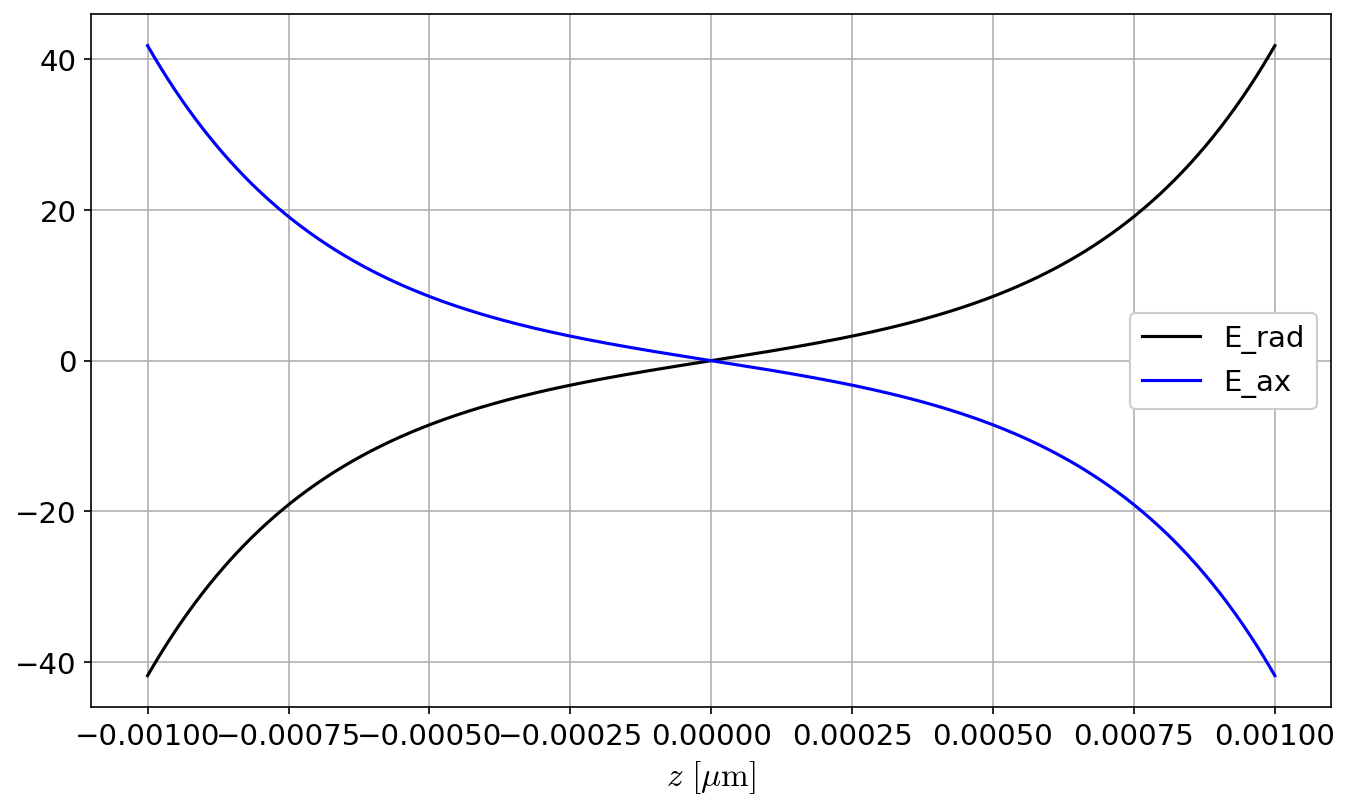

PyObject <matplotlib.legend.Legend object at 0x7ff6c5da4610>

In [23]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

line1 = x.plot(z_rad, E_field_rad, color="black", label="E_rad")
#line2 = x.plot(z_ax, E_field_ax, color="blue", label="E_ax")
#line2 = x.plot(z_ax_data, E_field_ax_data, color="blue")
line3 = x.plot(z_ax, 0.5*E_field_ax - 0.5*reverse(E_field_ax), color="blue", label="E_ax")
#line4 = x.plot(z_ax, - reverse(E_field_ax), color="blue", label="E_ax")
x.set_xlabel(L"z \,\, \rm{[\rm{\mu} m]}", fontsize=16)
#x.set_ylabel(L"E_{\rm{rf},\it{z}} \, \, \rm{[V/m]}", fontsize=16)

x.grid()
x.legend(framealpha=1)

In [31]:
## fit pole generovaneho axialni elektrodou
using LsqFit
#import Pkg; Pkg.add("LsqFit")
# model
model(z, p) = p[1] .+ p[2]*z .+ p[3] * z.^2 .+ p[4] * z.^3 .+ p[5] * z.^4 .+ p[6] * z.^5 .+ p[7] * z.^6 .+ p[8] * z.^7 .+ p[9] * z.^8  

#model(z, p) = p[1]*z 

p0 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

# fit = curve_fit(model, z*1e3, E_field, p0)
# param = fit.param
# print(param)

# # fit curve
# z_fit = range(minimum(z), maximum(z), length=200)
# E_field_fit = model(z_fit, [param[1]*1e3, param[2]*1e9, param[3]*1e15])

# [param[1]*1e3, param[2]*1e9, param[3]*1e15]


fit = curve_fit(model, z_ax*1e6, E_field_ax, p0)
param = fit.param
print(param)

# fit curve
z_ax_fit = range(minimum(z_ax)*1e6, maximum(z_ax)*1e6, length=200)
E_field_ax_fit = model(z_ax_fit, param)

#print( confidence_interval(fit, 0.99) )


[-4.310056445994107, -0.012262490176445684, -1.851793525210967e-5, -1.925245519004147e-8, -1.513422015600348e-11, -9.082244895085735e-15, -4.788942594480732e-18, -2.81685475374468e-21, -1.0377306004093845e-24]

200-element Array{Float64,1}:
  -0.37485085091179404
  -0.38053180602367187
  -0.38668076180388977
  -0.3932680742738548 
  -0.40026748490397634
  -0.40765591692562975
  -0.4154132812855278 
  -0.4235222919714142 
  -0.4319682904424017 
  -0.44073907890168323
  -0.4498247621536241 
  -0.45921759779160787
  -0.46891185446745703
   ⋮                  
 -61.95644632667744   
 -63.9096132475981    
 -65.92485566315798   
 -68.00412494165302   
 -70.14943115815468   
 -72.36284468532908   
 -74.64649781949083   
 -77.00258644244036   
 -79.43337171963569   
 -81.9411818352552    
 -84.528413764713     
 -87.19753508519065   

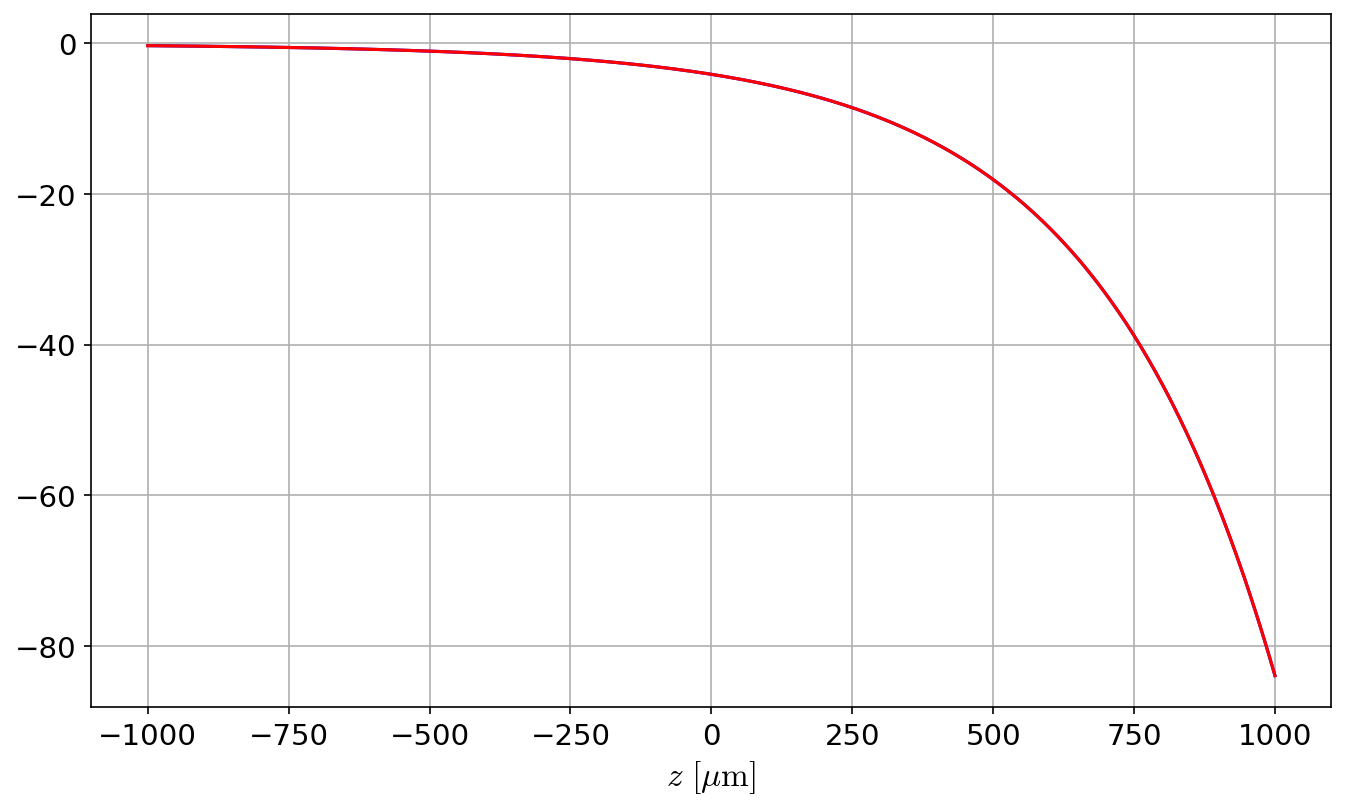

In [25]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

line1 = x.plot(z_ax*1e6, E_field_ax, color="blue")
#line2 = x.plot(z_ax_data, E_field_ax_data, color="blue")
line3 = x.plot(z_ax_fit, E_field_ax_fit, color="red")
x.set_xlabel(L"z \,\, \rm{[\rm{\mu} m]}", fontsize=16)
#x.set_ylabel(L"E_{\rm{rf},\it{z}} \, \, \rm{[V/m]}", fontsize=16)

x.grid()

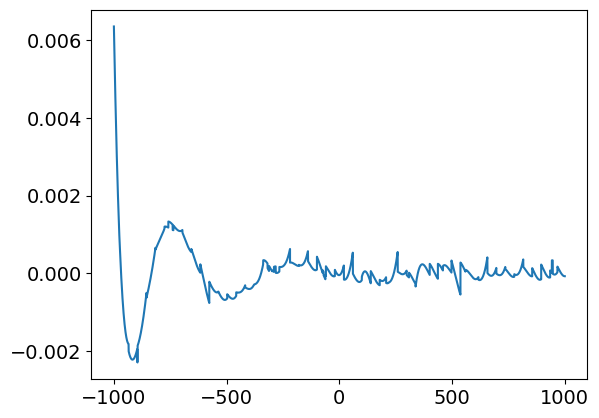

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff6c5c35310>

In [26]:
figure()

plot(z_ax*1e6, residuals(fit)./(E_field_ax))

sedmý řád vypadá celkem ok, relativní odchylky pod 1%

## celkova superpozice oscilujici casti axialniho pole

nyni si vytvorim funkce vracejici nalezene polynomy

jako jiny pristup me napada interpolovat numericke data a pouzivat je jako bazove axialni pole

In [52]:
function get_E_0_rad(z)
    # funkce vraci bazove pole buzene radialnimi elektrodami v bodech zadanych vektorem z
    
    # prebiram jiz znamy fit
    par = [0.01203659299655656, 1.6524840350930352e-8, 1.3106545696951533e-14]
    return( par[1] *z .+ par[2] * z.^3 .+ par[3] * z.^5 )
end

function get_E_0_ax(z)
    # funkce vraci bazove pole buzene axialni elektrodou v bodech zadanych vektorem z
    
    # fitovano vyse
    p = [-4.163032056645043, -0.011817352268117576, -1.783136010925378e-5, -1.8489633482149826e-8, -1.4464616482180333e-11, 
        -8.774799383442366e-15, -4.758090673172841e-18, -2.6886103551599205e-21, -9.180989378234005e-25]
    return( p[1] .+ p[2]*z .+ p[3] * z.^2 .+ p[4] * z.^3 .+ p[5] * z.^4 .+ p[6] * z.^5 .+ p[7] * z.^6 .+ p[8] * z.^7 .+ p[9] * z.^8 )
end

get_E_0_ax (generic function with 1 method)

In [101]:
print( get_E_0_rad([-1000, 1000]) .- [E_field_rad[1], E_field_rad[leng_rad]])
print(get_E_0_ax( [z_ax[1], z_ax[25001]]*1e6) .- [E_field_ax[1], E_field_ax[25001] ] ) 

[0.09511148747983356, -0.09511148747983356][-0.0023043882472389976, 0.0066424495292380925]

zda se, ze funguje ok

vyraz pro el. pole je dan superpozici. Nejprve napisu obecny vztah obsahujici i cas

In [65]:
# napeti a faze na elektrodach pasti
Vrf_x = -500
Vrf_y = 500
Vrf_5 = -40
Vrf_6 = 250
Vrf = [Vrf_x, Vrf_y, Vrf_5, Vrf_6]

D_phi = 0
phi_5 = 0
phi_6 = 0
phi = [D_phi, phi_5, phi_6];

In [66]:
# definuju funkci vracejici celkovou superpozici pro urcitou polohu a cas

function E_rf(t,z, Vrf, phi, Omega)
    # funkce vraci hodnotu RF pole v urcitem case a poloze na ose z
    # format vystupu: Erf[ indexovani casu, indexovani z ]
    len_t = length(t)
    len_z = length(z)
    
    rad_coef = Vrf[2] .* cos.(Omega.*t .+ 0.5*phi[1]) .+ Vrf[1] .* cos.(Omega.*t .- 0.5*phi[1])  # koeficient stojici pred radialnim bazovym polem
    ax_coef_5 = - Vrf[3] .* cos.(Omega.*t .+ phi[2]) # koeficient stojici pred axialnim bazovym polem
    ax_coef_6 = Vrf[4] .* cos.(Omega.*t .+ phi[3])
    #print(ax_coef)
    
    Erf = zeros(len_t, len_z)
    for i in 1:length(t)
        Erf[i,:] = rad_coef[i]*get_E_0_rad(z) .+ ax_coef_6[i]*get_E_0_ax(z) .+ ax_coef_5[i] * get_E_0_ax(-z)
    end
    
    return Erf  # vraci superpozici
end

E_rf (generic function with 1 method)

Zkusim vykreslit amplitudu pro asymetricke buzeni -- test

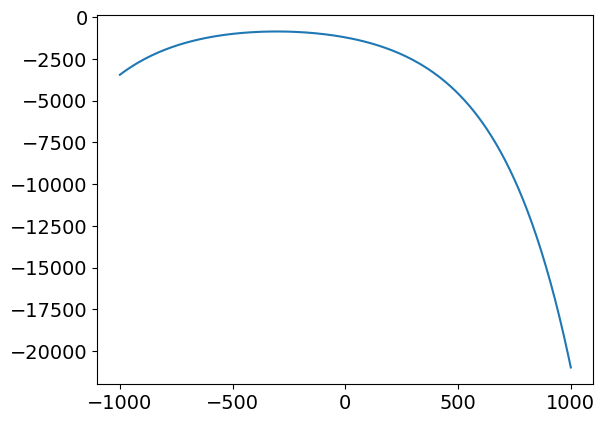

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f64f8ba8710>

In [67]:
# RF pole je max. v case 0

z = range(-1000, 1000, length=200)
#t = range(0, 2*pi, length=200)
t = [0]
#E_rf(t, z, Vrf, phi, 1)
plot(z, E_rf(t, z, Vrf, phi, 1)')

## Komplexni form.

Z vyse uvedeneho vyrazu ihned nevidim amplitudu. Proto zkousim pouzit komplexni formalismus

In [11]:
# na papire mi vyslo, ze komplexni amplituda el. pole by mela jit spocitat nasledovne

function E_rf_complex(z, Vrf, phi)
    # funkce vraci komplexni amplitudu oscilujiciho pole
    # abychom dostali realnou hodnotu melo by stacit vynasobit amplitudu faktorem  exp(i Omega*t) a vzit realnou cast
    
    rad_coef = Vrf[2] .*exp( 0.5*phi[1] * 1im) .+ Vrf[1] .*exp( - 0.5*phi[1] * 1im)
    ax_coef_5 = Vrf[3] .* exp( phi[2] * 1im)
    ax_coef_6 = Vrf[4] .* exp( phi[3] * 1im)
    
    return rad_coef * get_E_0_rad(z) .+ ax_coef_6 * get_E_0_ax(z) .- ax_coef_5 * get_E_0_ax(-z)
end

E_rf_complex (generic function with 1 method)

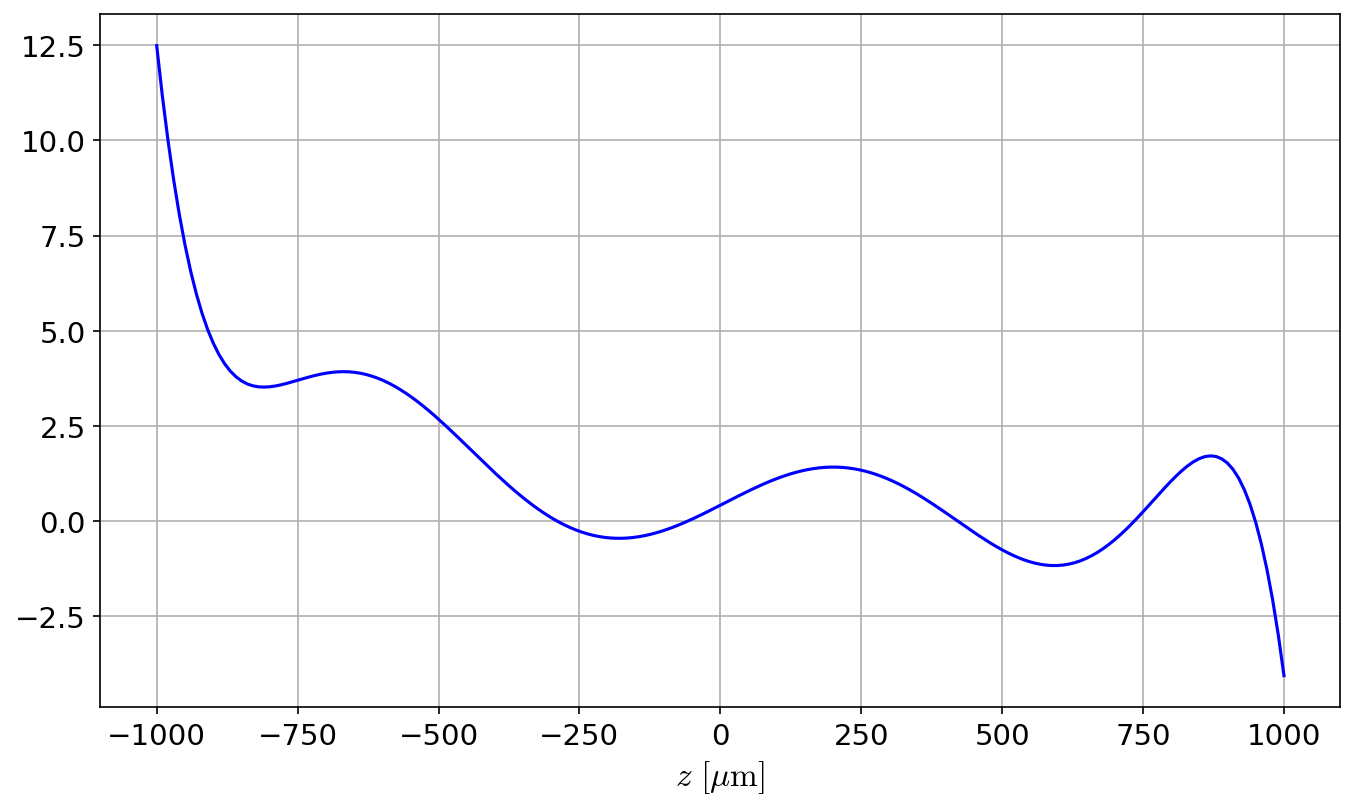

In [217]:
# velikost Erf pole

z = range(-1000, 1000, length=200)

abs.( E_rf_complex(z, Vrf, phi) )

my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

line1 = x.plot(z, real.( E_rf_complex(z, Vrf, phi) ), color="blue")

x.set_xlabel(L"z \,\, \rm{[\rm{\mu} m]}", fontsize=16)
#x.set_ylabel(L"E_{\rm{rf},\it{z}} \, \, \rm{[V/m]}", fontsize=16)

x.grid()

In [224]:
# napeti a faze na elektrodach pasti
Vrf_x = -210
Vrf_y = 250
Vrf_5 = 20
Vrf_6 = 20
Vrf = [Vrf_x, Vrf_y, Vrf_5, Vrf_6]

D_phi = -0.00005
phi_5 = 0
phi_6 = 0
phi = [D_phi, phi_5, phi_6];

z = range(-1000, 1000, length=200);

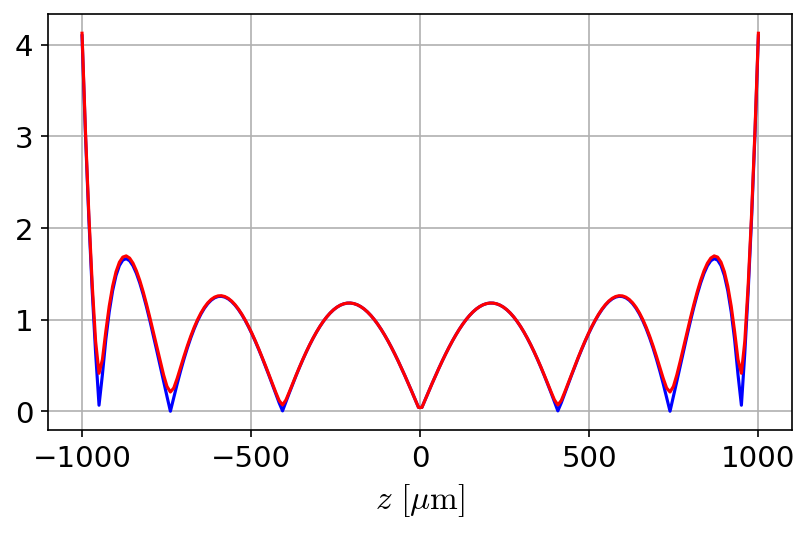

In [225]:
my_dpi = 150
siz = 60
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

line1 = x.plot(z, abs.( real.( E_rf_complex(z, Vrf, phi) ) ), color="blue")
line2 = x.plot(z, abs.( E_rf_complex(z, Vrf, phi) ), color="red")

x.set_xlabel(L"z \,\, \rm{[\rm{\mu} m]}", fontsize=16)
#x.set_ylabel(L"E_{\rm{rf},\it{z}} \, \, \rm{[V/m]}", fontsize=16)

x.grid()